In [281]:
"""
Question 1:
P(a,b,c,d,e,f,g) = P(a) * P(b|a) * P(c|b) * P(d|c,f) * P(e,d) * P(f|g) * P(g)

Question 2:
P(K=1|a,b,c') = P(k) * P(a|k) * P(b|k) * P(c'|k) = 0.5 * 0.5 * 0.25 * 0.5 = 0.03125

P(K=0|a,b) = P(k') * P(a|k') * P(b|k') = 0.5 * 0.5 * 0.5 = 0.125

"""

"\nQuestion 1:\nP(a,b,c,d,e,f,g) = P(a) * P(b|a) * P(c|b) * P(d|c,f) * P(e,d) * P(f|g) * P(g)\n\nQuestion 2:\nP(K=1|a,b,c') = P(k) * P(a|k) * P(b|k) * P(c'|k) = 0.5 * 0.5 * 0.25 * 0.5 = 0.03125\n\nP(K=0|a,b) = P(k') * P(a|k') * P(b|k') = 0.5 * 0.5 * 0.5 = 0.125\n\n"

In [224]:
import pandas as pd
import numpy as np
import random
import math
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [208]:
#Load DataFrame from file
def load_frame():
    file_name = "otto"
    csv = f"./{file_name}.csv"
    df = pd.read_csv(csv)
    return df

df = load_frame()
df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,Class_9
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [28]:
#Print out of number of instances and classes in Dataset
rows, columns = df.shape
classes = columns -2
print(f'There are {rows} instance in the dataset.')
print(f'There are {classes} classes in the dataset.')



There are 61878 instance in the dataset.
There are 93 classes in the dataset.


In [225]:
#Filter out rows with all 0 if there is any
df = df.loc[(df!=0).any(axis=1)]


In [30]:
#Transform non numerical column
#creating labelEncoder
le = preprocessing.LabelEncoder()

target = le.fit_transform(df.target)

In [35]:
#Drop the non numerical version of target
df = df.drop(labels='target', axis=1)

In [37]:
#Append numerical version column of target
df['target'] = target

In [38]:
df

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,61874,1,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,2,0,8
61874,61875,4,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,8
61875,61876,0,0,0,0,0,0,0,3,1,...,0,3,1,0,0,0,0,0,0,8
61876,61877,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,8


In [45]:
#Split dataset by desc features and target
X = df.iloc[:,1:-1]
y = df.target

In [62]:
#Split data randomly into 80,20 training testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
x_train = x_train.sort_index(axis=0)
y_train = y_train.sort_index(axis=0)
x_test = x_test.sort_index(axis=0)
y_test = y_test.sort_index(axis=0)

In [63]:
x_train

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,1,6,1,5,0,0,1,...,22,0,1,2,0,0,0,0,0,0
5,2,1,0,0,7,0,0,0,0,0,...,1,0,3,0,0,0,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,1,0,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2,0
61874,4,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,2,0,0,1,0
61875,0,0,0,0,0,0,0,3,1,0,...,0,0,3,1,0,0,0,0,0,0
61876,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,3,10,0


In [65]:
x_test

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_84,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,2,0,0,0,0,0,0,2,0,1,...,0,1,1,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
32,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
34,2,0,0,0,0,2,4,1,0,0,...,0,0,0,1,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61833,0,0,0,0,0,0,0,3,0,1,...,0,0,1,0,0,1,0,0,3,0
61835,0,0,0,1,0,1,0,8,0,0,...,0,0,4,2,0,0,0,0,0,0
61856,0,0,1,0,0,0,1,3,0,0,...,0,1,7,3,0,1,0,0,1,0
61860,0,0,0,0,0,0,0,3,0,0,...,0,0,0,0,0,1,0,0,0,0


In [266]:
#KNN Training, used to return accuracy of different knn models

def train_knn(neighbors, x_train, y_train, x_test, y_test):
    print(neighbors)
    knn_model = KNeighborsClassifier(n_neighbors=neighbors)
    knn_model.fit(x_train, y_train)
    y_pred= knn_model.predict(x_test)
    accuracy = metrics.f1_score(y_test, y_pred, average="macro")
    return accuracy, knn_model

In [267]:
highest_accuracy = 0
neighbors = 0

#Find best # of neighbors for KNN from 1-10. 
#Running this will take about 2.5minutes due to approx 16 sec per iteration
for i in range(1, 11):
    accuracy, model = train_knn(i, x_train, y_train, x_test, y_test)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        neighbors = i
    
print(f"{neighbors} neighbors has the best accuracy with an accuracy of: {highest_accuracy}")

1
2
3
4
5
6
7
8
9
10
1 neighbors has the best accuracy with an accuracy of: 0.7333913402979751


In [263]:
#Create final KNN model of 1 neighbors
accuracy, knn_model = train_knn(1, x_train, y_train, x_test, y_test)
y_pred_knn = knn_model.predict(x_test)

In [249]:
#Random Forest Training, used to identify best forest type, and number of trees
def train_forest(criterion, trees, x_train, y_train, x_test, y_test):
    forest_model = RandomForestClassifier(trees, criterion=criterion, bootstrap=True, max_samples=1000)
    forest_model = forest_model.fit(x_train, y_train)
    y_pred = forest_model.predict(x_test)
    accuracy = metrics.f1_score(y_test, y_pred, average="macro")
    return accuracy, forest_model


In [254]:
highest_accuracy = 0
criterion = ""
trees = 0

#Find best number of tress + forest type for random forest
for i in range(1, 31):
    accuracy, forest_model = train_forest("gini", i, x_train, y_train, x_test, y_test)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        criterion = "gini"
        trees = i
    accuracy, forest_model = train_forest("entropy", i, x_train, y_train, x_test, y_test)
    if accuracy > highest_accuracy:
        highest_accuracy = accuracy
        criterion = "entropy"
        trees = i


print(f"{trees} trees and {criterion} criterion has the best accuracy with an accuracy of: {highest_accuracy}")


    

28 trees and gini criterion has the best accuracy with an accuracy of: 0.5902279292476185


In [186]:
#create final model for random forest
accuracy, forest_model = train_forest("gini", 28, x_train, y_train, x_test, y_test)
y_pred_forest = forest_model.predict(x_test)

In [236]:
#Find the best 
model = GaussianNB()
y_pred = model.fit(x_train, y_train).predict(x_test)
accuracy = metrics.f1_score(y_test, y_pred, average="macro")
print(f"Gaussian accuracy: {accuracy}")

model = MultinomialNB()
y_pred = model.fit(x_train, y_train).predict(x_test)
accuracy = metrics.f1_score(y_test, y_pred, average="macro")
print(f"Multinomial accuracy: {accuracy}")

model = ComplementNB()
y_pred = model.fit(x_train, y_train).predict(x_test)
accuracy = metrics.f1_score(y_test, y_pred, average="macro")
print(f"Complement accuracy: {accuracy}")


#Cateforical does not work due to dataset not being balanced
"""
model = CategoricalNB()
y_pred = model.fit(x_train, y_train).predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Gaussian accuracy: {accuracy}")
"""

model = BernoulliNB()
y_pred = model.fit(x_train, y_train).predict(x_test)
accuracy = metrics.f1_score(y_test, y_pred, average="macro")
print(f"Bernoulli accuracy: {accuracy}")

print("Multinomial Naive Bayes is the best")

Gaussian accuracy: 0.5410641552478358
Multinomial accuracy: 0.6194632487337158
Complement accuracy: 0.5326973260578173
Bernoulli accuracy: 0.5338244413955449
Multinomial Naive Bayes is the best


In [248]:
#create nb final model
nb_model = MultinomialNB()
y_pred_nb = nb_model.fit(x_train, y_train).predict(x_test)
accuracy = metrics.f1_score(y_test, y_pred_nb, average="macro")

In [264]:
nb_report = classification_report(y_test, y_pred_nb)
knn_report = classification_report(y_test, y_pred_knn)
gini_forest_report = classification_report(y_test, y_pred_forest)

In [268]:
#Get final results for models
print('---------Multinomial Naive Bayes Model Report---------')
print(nb_report)

print('\n----------1-Nearest Neighbors Model Report----------')
print(knn_report)

print('\n---------------Gini Forest Model Report---------------')
print(gini_forest_report)

---------Multinomial Naive Bayes Model Report---------
              precision    recall  f1-score   support

           0       0.24      0.54      0.33       399
           1       0.72      0.65      0.68      3178
           2       0.41      0.27      0.32      1561
           3       0.24      0.63      0.34       538
           4       0.90      0.96      0.93       565
           5       0.92      0.81      0.87      2884
           6       0.59      0.59      0.59       552
           7       0.89      0.66      0.76      1674
           8       0.70      0.82      0.75      1025

    accuracy                           0.66     12376
   macro avg       0.62      0.66      0.62     12376
weighted avg       0.72      0.66      0.68     12376


----------1-Nearest Neighbors Model Report----------
              precision    recall  f1-score   support

           0       0.59      0.64      0.61       399
           1       0.72      0.78      0.75      3178
           2       0.52

In [167]:
#Concluding Statements

In [269]:
"""As you can see our 1-NN model was significantly better in performance than our Gini Forest model, 
and Naive bayes model. The KNN model had an f1 score of 73%, while gini had a f1 score of 59% and 
NB a score of 62%. By looking at the recall rate it seems that the gini forest model missed classifying a lot of
classes in the dataset, more specifically class 4 and class 1(1-indexed). Thus although the gini forest model had 
a high precision rating, it suffered in recall, resulting in a lower f1 score. Looking at the naive bayes model,
both the recall and precision were equally mediocre, resulting in a mediocre f1 score. A distinct trait that I observed
the winning model have that the other don't is that KNN is a lazy learner, while the others are eager learner.
This could have played a factor in its better performance than the others since it does not have a pre-determined
function for calculating the new queries, allowing it to be more flexible with the data, specifically noisy data."""

"As you can see our 1-NN model was significantly better in performance than our Gini Forest model, \nand Naive bayes model. The KNN model had an f1 score of 73%, while gini had a f1 score of 59% and \nNB a score of 62%. By looking at the recall rate it seems that the gini forest model missed classifying a lot of\nclasses in the dataset, more specifically class 4 and class 1(1-indexed). Thus although the gini forest model had \na high precision rating, it suffered in recall, resulting in a lower f1 score. Looking at the naive bayes model,\nboth the recall and precision were equally mediocre, resulting in a mediocre f1 score. A distinct trait that I observed\nthe winning model have that the other don't is that KNN is a lazy learner, while the others are eager learner.\nThis could have played a factor in its better performance than the others since it does not have a pre-determined\nfunction for calculating the new queries, allowing it to be more flexible with the data, specifically noisy

In [191]:
sns.set_theme()

In [270]:
#Create dataframe for models with their results
results = {'KNN':y_pred_knn, 'Rforest':y_pred_forest, 'Bayes':y_pred_nb}
results_df = pd.DataFrame(results)

In [271]:
results_df

,KNN,Rforest,Bayes
0,0,7,0
1,8,1,0
2,7,1,8
3,0,5,8
4,0,7,0
...,...,...,...
12371,8,8,8
12372,8,8,8
12373,8,8,8
12374,8,8,8


In [272]:
#Calculate correlation matrix
correlation = results_df.corr()
correlation

,KNN,Rforest,Bayes
KNN,1.000000,0.781523,0.647434
Rforest,0.781523,1.000000,0.642699
Bayes,0.647434,0.642699,1.000000


<AxesSubplot:>

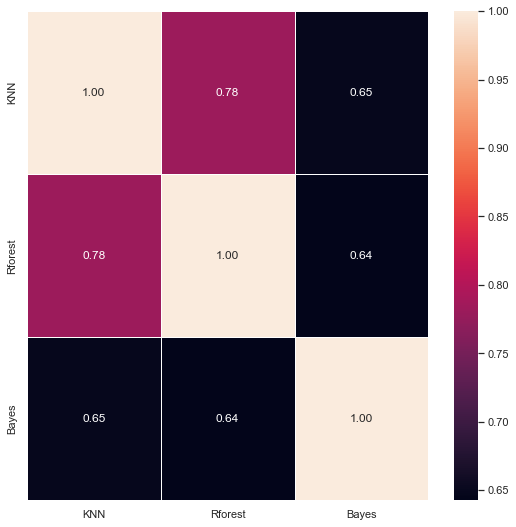

In [273]:
# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(correlation, annot=True, fmt=".2f", linewidths=.5, ax=ax)